/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=31).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=41).  Consider pre-proces

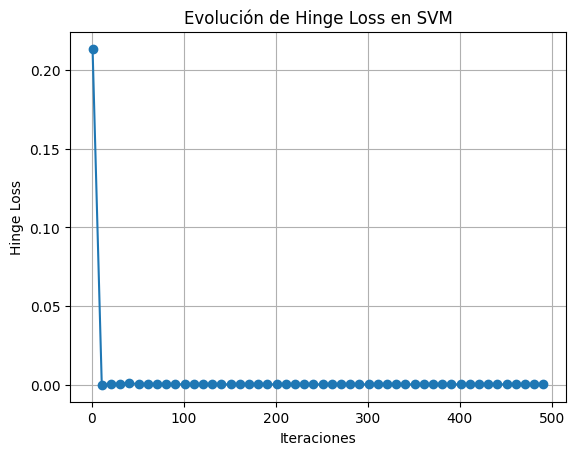

Último valor de Hinge Loss alcanzado: 0.000362


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss

# Crear datos
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas a -1 y 1

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista para registrar Hinge Loss en cada iteración
hinge_losses = []

# Entrenar SVM con diferentes iteraciones
for i in range(1, 500, 10):  # Aumentamos iteraciones progresivamente
    svm_model = SVC(kernel="linear", C=1.0, max_iter=i, tol=1e-6)  # Tol más bajo para seguir optimizando
    svm_model.fit(X_train, y_train)

    # Calcular Hinge Loss en el conjunto de prueba
    predictions = svm_model.decision_function(X_test)
    loss_value = hinge_loss(y_test, predictions)
    hinge_losses.append(loss_value)

# Graficar cómo baja Hinge Loss
plt.plot(range(1, 500, 10), hinge_losses, marker='o')
plt.xlabel("Iteraciones")
plt.ylabel("Hinge Loss")
plt.title("Evolución de Hinge Loss en SVM")
plt.grid()
plt.show()

# Mostrar el último valor de Hinge Loss alcanzado
print(f"Último valor de Hinge Loss alcanzado: {hinge_losses[-1]:.6f}")


Valor de Hinge Loss en el conjunto de prueba: 0.3411


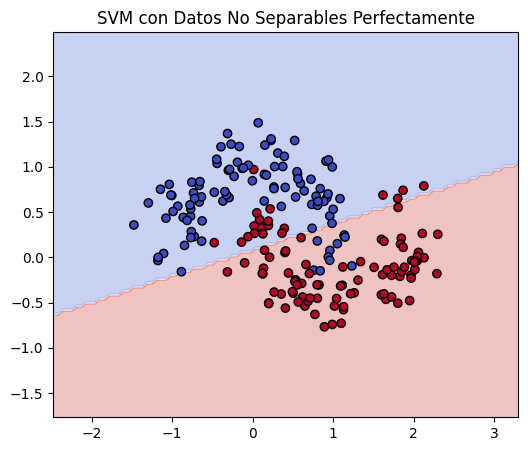

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss

# Crear un dataset con solapamiento (no separable perfectamente)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)  # Añadimos ruido
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas a -1 y 1

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar SVM con kernel lineal y margen flexible
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

# Predicciones y cálculo de Hinge Loss
predictions = svm_model.decision_function(X_test)
loss_value = hinge_loss(y_test, predictions)

# Mostrar Hinge Loss alcanzado
print(f"Valor de Hinge Loss en el conjunto de prueba: {loss_value:.4f}")

# Visualizar la frontera de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar la frontera de decisión del modelo
plot_svm_decision_boundary(svm_model, X, y, "SVM con Datos No Separables Perfectamente")


In [3]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de valores de C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(SVC(kernel="linear", tol=1e-6), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor valor de C encontrado
print("Mejor C encontrado:", grid_search.best_params_['C'])


Mejor C encontrado: 0.1


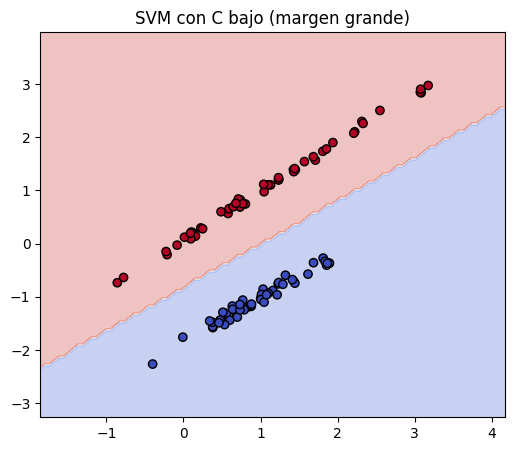

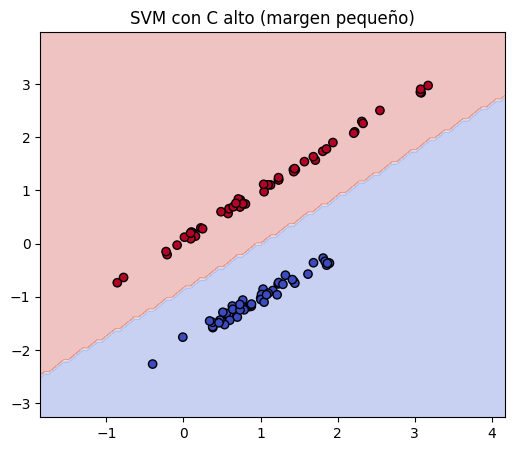

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Crear datos de clasificación
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas a -1 y 1

# Entrenar SVM con diferentes valores de C
svm_c_low = SVC(kernel="linear", C=0.1)  # Margen amplio, más errores permitidos
svm_c_high = SVC(kernel="linear", C=100)  # Margen pequeño, menos errores permitidos

svm_c_low.fit(X, y)
svm_c_high.fit(X, y)

# Graficar la frontera de decisión
def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k")
    plt.title(title)
    plt.show()

# Graficar modelos con C bajo y alto
plot_svm_decision_boundary(svm_c_low, X, y, "SVM con C bajo (margen grande)")
plot_svm_decision_boundary(svm_c_high, X, y, "SVM con C alto (margen pequeño)")


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss, mean_absolute_error

# Crear datos de clasificación
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convertimos etiquetas a -1 y 1

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos con diferentes funciones de pérdida
svm_hinge = LinearSVC(loss="hinge", max_iter=10000)
svm_squared_hinge = LinearSVC(loss="squared_hinge", max_iter=10000)

svm_hinge.fit(X_train, y_train)
svm_squared_hinge.fit(X_train, y_train)

# Predicciones y cálculo de pérdidas
pred_hinge = svm_hinge.decision_function(X_test)
pred_squared_hinge = svm_squared_hinge.decision_function(X_test)

loss_hinge = hinge_loss(y_test, pred_hinge)
loss_squared_hinge = np.mean((np.maximum(0, 1 - y_test * pred_squared_hinge))**2)

print(f"Hinge Loss: {loss_hinge:.4f}")
print(f"Squared Hinge Loss: {loss_squared_hinge:.4f}")

# --- REGRESIÓN ---
# Crear datos de regresión
X_reg = np.linspace(-3, 3, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(scale=0.1, size=X_reg.shape[0])

# Entrenar modelo SVR (no usa Hinge Loss)
svr_model = SVR(kernel="linear")
svr_model.fit(X_reg, y_reg)

# Predicciones y cálculo de pérdida (Mean Absolute Error en lugar de Hinge Loss)
y_pred_svr = svr_model.predict(X_reg)
mae = mean_absolute_error(y_reg, y_pred_svr)

print(f"Epsilon-Insensitive Loss (usando MAE como referencia): {mae:.4f}")


Hinge Loss: 0.0004
Squared Hinge Loss: 0.0014
Epsilon-Insensitive Loss (usando MAE como referencia): 0.3495


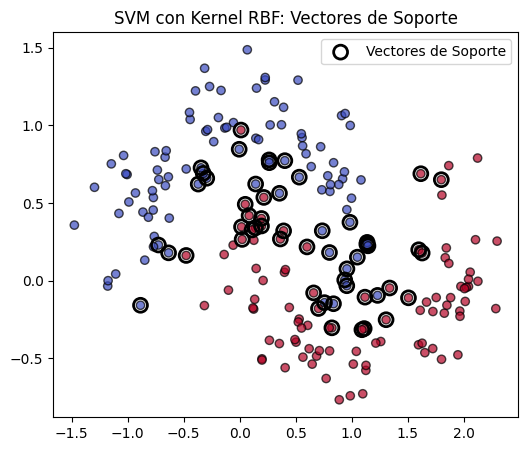

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Crear datos con una forma no lineal
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Entrenar SVM con kernel RBF
svm_rbf = SVC(kernel="rbf", C=1.0)
svm_rbf.fit(X, y)

# Obtener los vectores de soporte
support_vectors = svm_rbf.support_vectors_

# Graficar datos y vectores de soporte
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k", alpha=0.7)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=2, label="Vectores de Soporte")
plt.title("SVM con Kernel RBF: Vectores de Soporte")
plt.legend()
plt.show()


Vectores de soporte con kernel lineal: 73
Vectores de soporte con kernel RBF: 54
Vectores de soporte con kernel Polinómico: 80


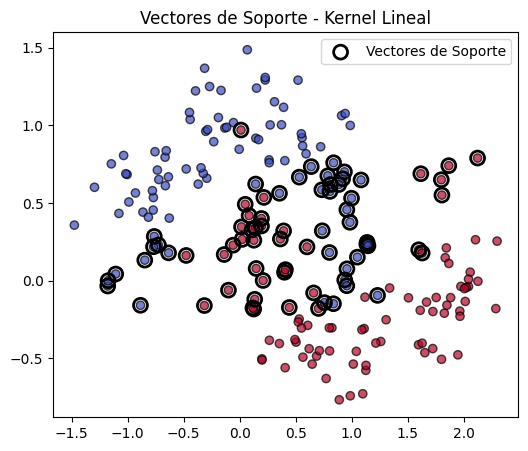

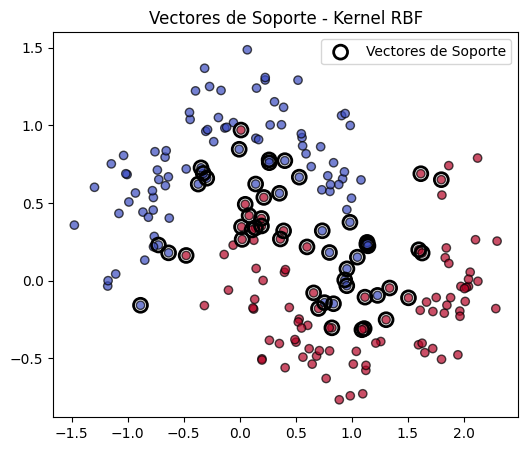

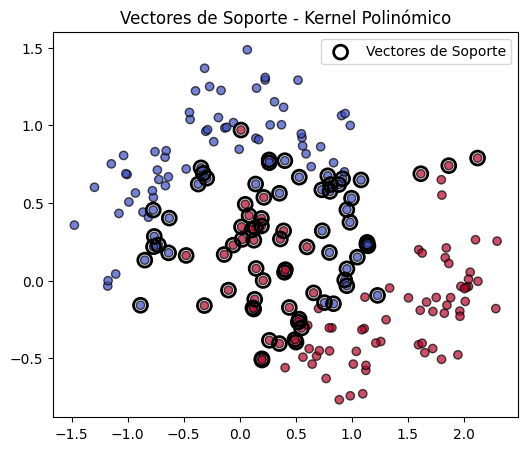

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Crear datos no linealmente separables
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Entrenar modelos SVM con diferentes kernels
svm_linear = SVC(kernel="linear", C=1.0)
svm_rbf = SVC(kernel="rbf", C=1.0)
svm_poly = SVC(kernel="poly", degree=3, C=1.0)

svm_linear.fit(X, y)
svm_rbf.fit(X, y)
svm_poly.fit(X, y)

# Cantidad de vectores de soporte
print(f"Vectores de soporte con kernel lineal: {len(svm_linear.support_vectors_)}")
print(f"Vectores de soporte con kernel RBF: {len(svm_rbf.support_vectors_)}")
print(f"Vectores de soporte con kernel Polinómico: {len(svm_poly.support_vectors_)}")

# Graficar los vectores de soporte para cada modelo
def plot_svm_support_vectors(model, X, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors="k", alpha=0.7)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=2, label="Vectores de Soporte")
    plt.title(title)
    plt.legend()
    plt.show()

# Mostrar los vectores de soporte en cada modelo
plot_svm_support_vectors(svm_linear, X, y, "Vectores de Soporte - Kernel Lineal")
plot_svm_support_vectors(svm_rbf, X, y, "Vectores de Soporte - Kernel RBF")
plot_svm_support_vectors(svm_poly, X, y, "Vectores de Soporte - Kernel Polinómico")
